# Bayesian statistics

By the beginning of the 20th century the notion of *probability* was established as the limit of the relative frequency of events after many trials. Kolmogorov published his axioms in the 1930s and shown how to build probability theory upon these axioms. Statistics was traditionally based on this notion of probability. 

Admittedly, we need statistics to interpret our results correctly (and to publish them). But problems in probability and statistics can be very confusing to the intuition. Let's cite an example from the book by [J.L. Simon (1997)](https://www.resample.com/intro-text-online/).

>If a family has two children and one of them is a boy, what is the probability that the other will also be a boy?
Most people - even professional statisticians - often quickly answer "one half." That is not correct.

>Why is statistics such a tough subject for so many people? ... The root of the difficulty is that the *subject matter* is extremely difficult.

In the 1920s and 1930s the *classical concept* of statistics was developed following the works of R.A. Fisher, J. Neyman and E. Pearson. One important branch of statistics is *inferential statistics*, which involves drawing the right conclusions from the statistical analysis of samples. In statistics, point estimation involves the use of sample data to calculate a single value (known as a point estimate since it identifies a point in some parameter space) which is to serve as a "best guess" or "best estimate" of an unknown population parameter. 

But there is a different approach to statistics, the Bayesian approach, which depends on the subjective definition of probability and which many people find more intuitive than traditional statistics. In some respects, Bayesian methods are older than frequentist ones, having their origins dated back to the 18th century. *Bayesian statistics* as it is now understood, however, dates back to the 1950s.
 

## Differences between traditional and Bayesian statistics

There are many viewpoints on the topic what is the fundamental difference between traditional and Bayesian approaches to statistics. Some argue that it is subjective probability, others say it is Bayes' theorem or subjective priors. We may simply state that you use Bayesian data analysis when you use *probability* to represent *uncertainty* in *all parts* of a statistical model.

From a practical point of view traditional and Bayesian methods require different kinds of integration: integration over samples or hypotheses (parameters). And it is also safe to say that Bayesian methods are computationally more intensive than traditional ones.
"What most fundamentally distinguishes Bayesian calculations from frequentist calculations is not modulation by priors, but the key role of probability distributions over parameter (hypothesis) space in the former, and the complete absence of such distributions in the latter. Via Bayes’s theorem, a prior enables one to use the likelihood function -describing a family of measures over the sample space - to build the posterior distribution - a measure over the parameter (hypothesis) space" ([T. Loredo](http://arxiv.org/pdf/1208.3036v2))

Next we use two simple examples to illustrate Bayesian statistics. Bayesian methods are increasingly used in many fields, hence it is useful to get acquinted with these methods.
Finally various applications of Bayesian methods in geodesy will be enlisted.

## Bayes’ Billiards Game

This example in one form or another, dates all the way back to the posthumously-published 1763 paper written by Thomas Bayes. The following description and discussion of the game is from the papers by [Eddy(2004)](http://halfonlab.ccr.buffalo.edu/Bioinformatics%20Primers%20from%20Nature%20Biotechnology/Eddy_2004_Nat%20Biotechnol-15340486.pdf) and [Jake VanderPlas (2014)](http://arxiv.org/pdf/1411.5018v1).

Alice and Bob are playing a game in which the first person to get 6 points wins. The way each point is decided is a little strange. The Casino has a pool table that Alice and Bob can’t see. Before the game begins, the Casino rolls an initial ball onto the table, which comes to rest at a completely random position, which the Casino marks. Then, each point is decided by the Casino rolling another ball onto the table randomly. If it comes to rest to the left of the initial mark, Alice wins the point; to the right of the mark, Bob wins the point. The Casino reveals nothing to Alice and Bob except who won each point. ![](biliard_en.png)

Clearly, the probability that Alice wins a point is the fraction of the table to the left of the mark - call this probability $p$; and Bob’s probability of winning a point is $1 - p$. Because the Casino rolled the initial ball to a random position, before any points were decided every value of $p$ was equally probable. The mark is only set once per game, so $p$ is the same for every point.

Imagine Alice is already winning 5 points to 3, and now she bets Bob that she’s going to
win. What are fair betting odds for Alice to offer Bob? That is, what is the expected probability that Alice will win?


### If *p* were known, this would be easy

Because Alice just needs one more point to win, Bob only wins the game if he takes the
next three points in a row. The probability of this is $(1-p)^3$; Alice will win on any other outcome, so the probability of her winning is $[1-(1-p)^3]$. If Alice knew $p$, it would be easy for her to calculate fair odds. For instance, if the mark were exactly in the middle of the table (or if this were the ‘coin game,’ where points are decided by flipping a fair coin), $p$ would be 0.5; the probability that Bob would win would be $(1-0.5)^3$, or 1/8; and the probability that Alice would win would be 7/8; fair odds would be 7:1.

What we’re doing here? We are calculating the probability of observing some data (the outcomes of up to the next three points) given a probability *model* (the probability $p$). The general notation for such a probability is *P*(data|model), where the ‘|’ sign means ‘given’ or ‘conditional upon.’ So this comes from a statistical model and it is the *likelihood*. Likelihood characterizes the connection between model parameter(s) and data. It is called likelihood because it is used for telling what model parameters may have produced most likely the observed data. In other words, the maximum likelihood method seeks those parameters that ensure the actual sample is the most probable one from among all the possible samples with different parameters.

A *nuisance parameter* is any quantity whose value is not directly relevant to the goal of an analysis, but is nevertheless required to determine the result which is of interest. In this example the probability $p$ is such a typical nuisance parameter.

### Inferring *p* from the data

The problem is that Alice and Bob don’t know $p$. The very fact that Alice is ahead 5-3 is evidence that the unknown position of the mark is probably giving Alice an advantage, but the numbers are small, and she can’t be sure. Maybe the mark is in Bob’s favor and he’s just been unlucky so far.

This sets up a scientific inference problem. We have a limited amount of data: Alice is winning 5-3. We are interested in inferring an unknown ‘hypothesis’: the value of $p$. We want to use this inference to predict future events: how probable is it that Alice will win?

One approach would be to make a classical *maximum likelihood* estimate of the unknown parameter $p$. It is [easy to show](https://onlinecourses.science.psu.edu/stat504/node/28) using the binomial distribution, that because Alice has won 5 times from 8 trials, the maximum likelihood estimate of $p$ is equal with the frequency at which Alice has won so far, $5/8$. From this, we estimate that Bob’s probability of winning is ($(3/8)^3=27/512$, and Alice’s probability of winning is $485/512$; fair odds would be about 18:1.


### The Bayesian solution

The Bayesian approach is to write down exactly the probability we want to infer, in terms only of the data we know, and directly solve the resulting equation. One distinctive feature of a Bayesian approach is that if we need to invoke uncertain parameters in the problem, we do not attempt to make point estimates of these parameters; instead, we deal with uncertainty more rigorously, by integrating over all possible values that a parameter might assume.

Here, for instance, what we want to know is the expected probability that Bob will win
(call it $E$). By definition, this is the weighted average of $(1-p)^3$ over all possible values of $p$:

$$E(\mathrm{Bob\;wins})=\int_0^1 (1-p)^3 P(p \;| \;A=5, B=3) \;dp$$

where the $(1-p)^3$ term is the probability that Bob wins given a particular choice of $p$ and the $P(p \;| \;A=5, B=3)$ term is the probability that that particular choice of $p$ is the correct one, given the observed data that the score is Alice 5, Bob 3.

What is $P(p \;| \;A=5, B=3)$? The probability of the parameter $p$ given the data is not the same thing as the more familiar calculation of $P(A=5, B=3 \;| \;p)$, the probability of the data given a known parameter $p$. It is a so-called inverse probability problem. Rather than *P*(data | model), we need *P*(model | data).

The solution to inverse probability problems is the *Bayes’ theorem*, which can be easily derived from conditional probabilities of two random variables $X$ and $Y$:

$$P(X\;|\;Y) = \frac{P(Y\;|\;X) P(X)}{P(Y)} = \frac{P(Y\;|\;X) P(X)}{\sum_{X'}P(Y\;|\;X') P(X'))},$$

or, in this case,

$$P(p \;| \;A=5, B=3) = \frac{P(A=5, B=3 \;| \;p) P(p)}{\int_0^1 P(A=5, B=3 \;| \;p)\; P(p)\;dp)}.$$

That is, the probability of a particular choice of $p$ given the data (the ‘posterior probability’ of $p$) is proportional to the probability that we would get the observed data if that $p$ were true (the ‘likelihood’ of $p$) multiplied by the a priori probability of this $p$ relative to all other possible values of $p$ (the ‘prior probabil-
ity’ of $p$). 

To make this come out as a probability, we divide by a summation over all possible
values of $p$; because $p$ is a continuous variable, this means an integration from $p=0$ to $p=1$. 

We have also seen that with this Bayesian approach we got rid of the nuisance parameter by *marginalizing* (i.e. integrating) over the unknown $p$. This is typical of Bayesian statistics, while there is no completely satisfactory approach in conventional statistics how to get rid of these unnecessary parameters.

The use of inverse probability calculations and Bayes’ theorem is another distinctive feature of Bayesian approaches. If we interpret conditional probabilities in terms of causes and effects, then Bayes' theorem describes a forward-backward motion along the cause-effect chain. Backward motion (calculating inverse probabilities) is important but not natural in everyday thinking. Bayes' theorem formalizes this inverse thinking of trying to find causes from the effects.

The likelihood term is the term we know how to calculate; $P(A=5, B=3 \;| \;p)$ is a binomial $(8!/5!3!)p^5(1-p)^3$. Let us plot this likelihood function of our problem.

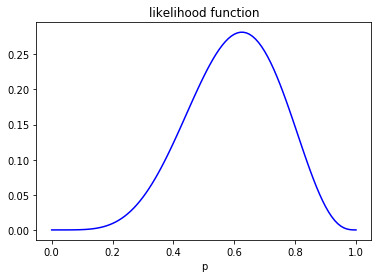

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom
%matplotlib inline

def likelihood(p):
    return binom(8, 5) * p**5 * (1-p)**3
p = np.linspace(0,1,101)
plt.plot(p,likelihood(p),'b-')
plt.xlabel('p')
plt.title('likelihood function')
plt.show()

It is clear that the maximum of the likelihood function is at 5/8=0.625, and this is the previous maximum likelihood estimate of $p$. Let us integrate the likelihood function.

In [2]:
from scipy.integrate import quad
ilikelihood = quad(likelihood,0,1)
print("integration result: ", ilikelihood)

integration result:  (0.11111111111111113, 1.2335811384723963e-15)


The prior term $P(p)$ is potentially problematic. By definition, $P(p)$ is a probability of $p$ *before* any data have been observed. How do we know anything about $p$ before we’ve seen any data?

A crucial feature of the billiards game is that $P(p)$ is well-defined: the game is contrived such that $p$ is picked from a *uniform distribution*.

It is easy to plot the probability density of $P(p)$. 

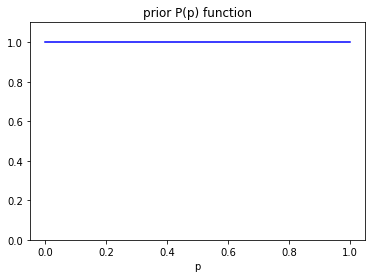

In [3]:
plt.plot(p,np.ones_like(p),'b-')
plt.ylim([0,1.1])
plt.xlabel('p')
plt.title('prior P(p) function')
plt.show()

Posterior probability is identical with likelihood due to the uniform prior disregarding a constant factor. Bob’s probability of winning is the integral of the posterior multiplied with $(1-p)^3$. Let us plot this function and integrate.

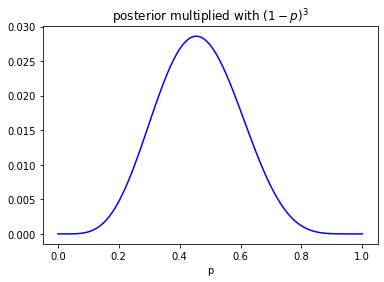

integration result:  (0.0101010101010101, 1.121437398611269e-16)


In [4]:
def postm(p):
    return binom(8, 5) * p**5 * (1-p)**6
p = np.linspace(0,1,101)
plt.plot(p,postm(p),'b-')
plt.xlabel('p')
plt.title('posterior multiplied with $(1-p)^3$')
plt.show()


ipostm = quad(postm,0,1)
print("integration result: ", ipostm)

Now we can calculate Bob's probability of winning. The ratio of the two: 

In [5]:
print("Bob's probability of winning is: {0:.4f}".format(ipostm[0]/ilikelihood[0]))

Bob's probability of winning is: 0.0909


We can give an algebraic solution to the problem. Since $P(p)$ is uniformly distributed, hence it is constant and cancels from Bayes' formula. After some algebraic rearrangement, we're left with:

$$E(\mathrm{Bob\;wins})=\frac{\int_0^1 p^5(1-p)^6\;dp}{\int_0^1 p^5(1-p)^3\;dp}.$$

It happens that these integrals have analytic solutions. A *beta integral* is

$$ \int_0^1 p^{m-1}(1-p)^{n-1}dp=\frac{\Gamma (n) \Gamma (m)}{\Gamma (m+n)}$$

where $Gamma (x)$ is a gamma function, a generalization of the better-known factorial function to real numbers: $\Gamma (n+1)=n!$ for an integer $n$. Let us calculate it with Python:

In [6]:
from scipy.special import beta
bayes_prob = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)
chance = (1-bayes_prob)/bayes_prob

print("E(Bob wins) = {0:.4f}".format(bayes_prob))
print("Fair odds for Alice: {0:.0f}:1".format(chance))

E(Bob wins) = 0.0909
Fair odds for Alice: 10:1


We get an answer of 1/11 for Bob’s expected probability of winning, and Alice’s expected
probability is 10/11. Thus, the Bayesian calculation estimates fair odds to be 10:1, which is significantly different from the maximum likelihood estimation, which is 18:1. Which one is correct, and why are these different?

### Monte-Carlo simulation

For a simple problem like this, we can answer this question empirically by simulating a large number of games and count the fraction of suitable games which Bob goes on to win. This can be coded in a couple dozen lines of Python. The calculation is especially simple because many random variables are uniformly distributed. Using the `numpy` library:

In [7]:
import numpy as np
np.random.seed(0)

# simulate 100000 games with randomly chosen p between 0 and 1
p = np.random.random(100000)

# one game has maximum 11 rolls, since 6 points are needed for winning
rolls = np.random.random((11, len(p)))

# calculate points for Alice and Bob
Alice_count = np.cumsum(rolls < p, 0)
Bob_count = np.cumsum(rolls >= p, 0)

# check: sum of points
total_wins = Alice_count + Bob_count
assert np.all(total_wins.T == np.arange(1, 12))
print("(check ok.)")

# check the number of games that meet the condition (A wins, B wins)=(5, 3)
# Bob got 3 points from 8
good_games = Bob_count[7] == 3
print("Number of good games: {0}".format(good_games.sum()))

# keep only these
Alice_count = Alice_count[:, good_games]
Bob_count = Bob_count[:, good_games]

# how many points Bob has got
# he has 6 points from 11
bob_won = np.sum(Bob_count[10] == 6)
print("Bob won: {0}".format(bob_won.sum()))

# calculate probability
mc_prob = bob_won.sum() * 1. / good_games.sum()
print("Monte Carlo probability of Bob's win: {0:.3f}".format(mc_prob))
print("MC probability of not Bob's win: {0:.1f} : 1".format((1. - mc_prob) / mc_prob))



(check ok.)
Number of good games: 11068
Bob won: 979
Monte Carlo probability of Bob's win: 0.088
MC probability of not Bob's win: 10.3 : 1


Simulation thus confirmed Bayesian solution and not the maximum likelihood estimation (MLE). Why?

The main reason is that MLE provided a point estimate of the parameter instead of determining the posterior *distribution*. The required result, probability of winning is usually a nonlinear transform $f$ of $p$, hence expectation $E[f(p)]$ is not equal with $f(E[p])$. Bayesian solution provides the first, which is correct; classical solution provides the second, which is not.

Bayesian methods provide results in terms of a posterior distribution, which is better, since it supports decisions in case of uncertainty.

Perhaps a suitable frequentist approach would be immediately obvious to an expert statistician, but is not particularly obvious to a statistical layperson. In this sense, it could be argued that for a problem such as this (i.e. with a well-motivated prior), Bayesianism provides a more natural framework for handling nuisance parameters: by simple algebraic manipulation of a few well known axioms of probability interpreted in a Bayesian sense, we straightforwardly arrive at the correct answer without need for other special statistical expertise.

### Solution with PyStan

[Stan](https://mc-stan.org/) is a state-of-the-art platform for statistical modeling and high-performance statistical computation. Stan is a [probabilistic programming](https://en.wikipedia.org/wiki/Probabilistic_programming) language for full Bayesian statistical inference with MCMC sampling, approximate Bayesian inference with variational inference and penalized maximum likelihood estimation with optimization. [PyStan](https://pystan.readthedocs.io/en/latest/) provides an interface to Stan.

A Stan program consists of a number of *blocks*.
```cpp
data { // the required data for the model
    // Declarations ...
}
parameters { // the model’s parameters
    // Declarations ...
}
model { // Defines the statistical model
    // Declarations followed by statements ...
}
generated quantities {
    // Declarations followed by statements ...
}
```

Running a Stan program is usually done from another language such as Python or R. Now we solve the billiard problem using the PyStan interface.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6f4a38dfce38dd06b464ec0f7a625495 NOW.


Inference for Stan model: anon_model_6f4a38dfce38dd06b464ec0f7a625495.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p          0.6  3.9e-3   0.15    0.3    0.5   0.61   0.71   0.86   1421    1.0
bob_win   0.09  2.4e-3   0.09 2.8e-3   0.02   0.06   0.13   0.35   1438    1.0
lp__     -7.25    0.02   0.73  -9.24  -7.44  -6.97  -6.78  -6.73   1487    1.0

Samples were drawn using NUTS at Thu Nov 26 08:09:31 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(432x288)


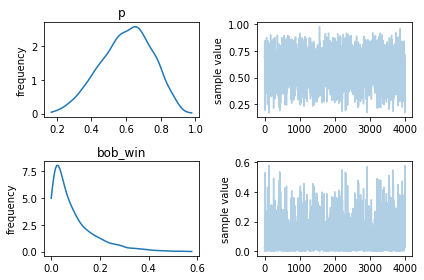

Betting odds for Alice is 10.035


In [8]:
import pystan
import pandas as pd
import matplotlib.pyplot as plt

# The Stan model as a string.
model_string = """
// Here we define the data we are going to pass into the model
data {
  int n; // Number of games
  int s;  // Number of wins by Alice
}

// Here we define what 'unknowns' aka parameters we have.
parameters {
  real<lower=0, upper=1> p;
}

// The generative model
model {
  p ~ uniform(0, 1);
  s ~ binomial(n, p);
}

generated quantities {
  real bob_win;
  bob_win = (1.0-p)^3;
}
"""

data_list = dict(n = 8, s = 5)

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())
plt.tight_layout()
plt.show()

# Export the samples to a data.frame for easier handling.
posterior = pd.DataFrame(stan_samples.extract())

# Odds for Alice vs Bob
rBob = sum(posterior.bob_win)/len(posterior.bob_win)
odds_Alice = (1-rBob)/rBob

print('Betting odds for Alice is {:.3f}'.format(odds_Alice))

## Linear Fit with Outliers

This second example is taken from [Jake VanderPlas](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/). Consider the following dataset of 20 datapoints, relating the observed variables $x$ and $y$, and the error of $y$ stored in $e$.

In [9]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

We'll visualize this data below:

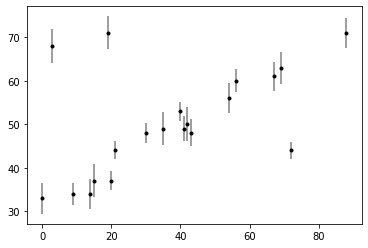

In [10]:
import matplotlib.pyplot as plt

plt.errorbar(x, y, e, fmt='.k', ecolor='gray');

Our task is to find a line of best-fit to the data. It's clear that there are some outliers, but let's start with a simple non-resistent maximum likelihood approach. The following simple maximum likelihood result can be considered to be Bayesian with uniform priors: in this sort of simple problem, the approaches are essentially equivalent.

We'll propose a simple linear model, which has a slope and an intercept encoded in a parameter vector $\theta$. The model is defined as follows:
$$
\hat{y}(x~|~\theta) = \theta_0 + \theta_1 x
$$
Given this model, we can compute a Gaussian likelihood for each point:
$$
p(x_i,y_i,e_i~|~\theta) \propto \exp\left[-\frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2\right]
$$
The total likelihood is the product of all the individual likelihoods. Computing this and taking the log, we have:
$$
\log \mathcal{L}(D~|~\theta) = \mathrm{const} - \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
This final expression is the log-likelihood of the data given the model, which can be maximized to find the $\theta$ corresponding to the maximum-likelihood model. Equivalently, we can minimize the summation term, which is known as the *loss*:
$$
\mathrm{loss} = \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
This loss expression is known as a *squared loss*; here we've simply shown that the squared loss can be derived from the Gaussian log likelihood.

### Standard Likelihood Approach

We can maximize the likelihood (or, equivalently, minimize the loss) to find $\theta$. For a flat prior in $\theta$, the maximum of the Bayesian posterior will yield the same result.

For simplicity, we'll use scipy's ``optimize`` package to minimize the loss (in the case of squared loss, this computation can be done more efficiently using matrix methods, but we'll use numerical minimization for simplicity here)

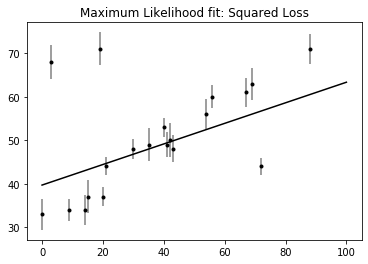

In [11]:
from scipy import optimize

def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)

xfit = np.linspace(0, 100)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
plt.title('Maximum Likelihood fit: Squared Loss');

It's clear on examination that the outliers are exerting a disproportionate influence on the fit. This is due to the nature of the squared loss function. If you have a single outlier that is, say 10 standard deviations away from the fit, its contribution to the loss will out-weigh that of 25 points which are 2 standard deviations away!

Clearly the squared loss is overly sensitive to outliers, and this is causing issues with our fit. One way to address this is to simply adjust the loss function to be more resistant to outliers.

### Correction for Outliers: Huber Loss

There are many loss functions, but one relatively well-motivated option is the [Huber loss](http://en.wikipedia.org/wiki/Huber_loss_function). The Huber loss defines a critical value at which the loss curve transitions from quadratic to linear. Let's create a plot which compares the Huber loss to the standard squared loss for several critical values $c$:

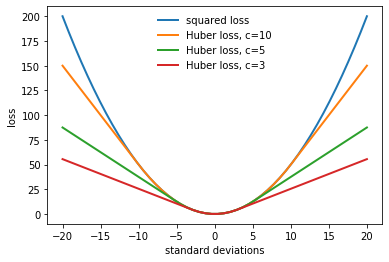

In [12]:
t = np.linspace(-20, 20)

def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2
            + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

plt.plot(t, 0.5 * t ** 2, label="squared loss", lw=2)
for c in (10, 5, 3):
    plt.plot(t, huber_loss(t, c), label="Huber loss, c={0}".format(c), lw=2)
plt.ylabel('loss')
plt.xlabel('standard deviations')
plt.legend(loc='best', frameon=False);

The Huber loss is equivalent to the squared loss for points which are well-fit by the model, but reduces the loss contribution of outliers. For example, a point 20 standard deviations from the fit has a squared loss of 200, but a c=3 Huber loss of just over 55. Let's see the result of the best-fit line using the Huber loss rather than the squared loss. We'll plot the squared loss result in light gray for comparison:

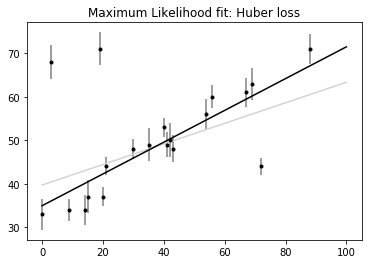

In [13]:
def total_huber_loss(theta, x=x, y=y, e=e, c=3):
    return huber_loss((y - theta[0] - theta[1] * x) / e, c).sum()

theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='black')
plt.title('Maximum Likelihood fit: Huber loss');

The fit is now much closer to our intuition. However it might be pointed out that the Huber loss seems a bit *ad hoc*: where does it come from? How should we decide what value of $c$ to use? Is there any good motivation for using a linear loss on outliers, or should we simply remove them instead? How might this choice affect our resulting model?

### A Bayesian Approach to Outliers

The Bayesian approach to accounting for outliers generally involves *modifying the model* so that the outliers are accounted for. For this data, it is clear that a simple straight line is not a good fit to our data. So let's propose a more complicated model that has the flexibility to account for outliers. One option is to choose a mixture between a signal and a background:

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{e_i\}~|~\theta,\{g_i\},\sigma,\sigma_b) = & \frac{g_i}{\sqrt{2\pi e_i^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2e_i^2}\right] \\
&+ \frac{1 - g_i}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_B^2}\right]
\end{array}
$$

What we've done is expanded our model with some nuisance parameters: $\{g_i\}$ is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the model. $g_i=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter, or its value can be set at a sufficiently high number, say 50.

Our model is much more complicated now: it has 22 parameters rather than 2, but the majority of these can be considered nuisance parameters, which can be marginalized-out in the end, just as we marginalized (integrated) over $p$ in the Billiard example.  Let's construct a function which implements this likelihood. We'll use the [emcee](http://dan.iel.fm/emcee/current/) package to explore the parameter space.

To actually compute this, we'll start by defining functions describing our prior, our likelihood function, and our posterior:

In [14]:
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i

def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

Now we'll run the MCMC samples to explore the parameter space:

In [15]:
# This step will take one minute to run...

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/home/tg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/tg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Once we have these samples, we can exploit a very nice property of the Markov chains. Because their distribution models the posterior, we can integrate out (i.e. marginalize) over nuisance parameters simply by ignoring them.

We can look at the (marginalized) distribution of slopes and intercepts by examining the first two columns of the sample:

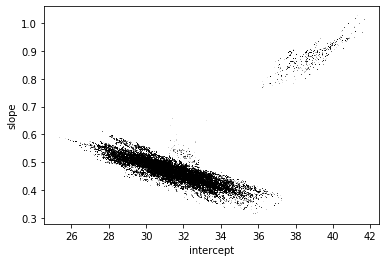

In [16]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

We see a distribution of points near a slope of $\sim 0.45$, and an intercept of $\sim 31$. We'll plot this model over the data below, but first let's see what other information we can extract from this trace.

One nice feature of analyzing MCMC samples is that the choice of nuisance parameters is completely symmetric: just as we can treat the $\{g_i\}$ as nuisance parameters, we can also treat the slope and intercept as nuisance parameters! Let's do this, and check the posterior for $g_1$ and $g_2$, the outlier flag for the first two points:

g1 mean: 0.61
g2 mean: 0.37


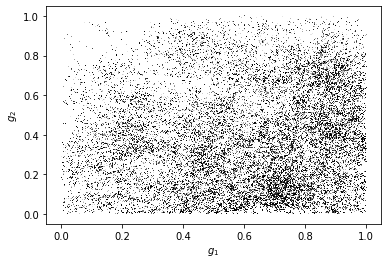

In [17]:
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')

print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))

There is not an extremely strong constraint on either of these, but we do see that $(g_1, g_2) = (1, 0)$ is slightly favored: the means of $g_1$ and $g_2$ are greater than and less than 0.5, respecively. If we choose a cutoff at $g=0.5$, our algorithm has identified $g_2$ as an outlier.

Let's make use of all this information, and plot the marginalized best model over the original data. As a bonus, we'll draw red circles to indicate which points the model detects as outliers:

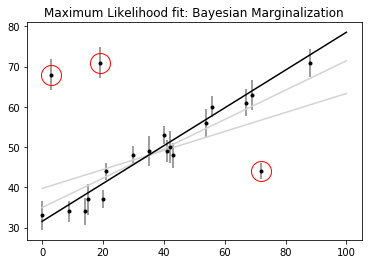

In [18]:
theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black')
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');

The result, shown by the dark line, matches our intuition. Furthermore, the points automatically identified as outliers are the ones we would identify by hand.  For comparison, the gray lines show the two previous approaches: the simple maximum likelihood and the approach based on Huber loss.

### Discussion

Here we've dived into linear regression in the presence of outliers. A typical Gaussian maximum likelihood approach fails to account for the outliers, but we were able to correct this by modifying the loss function, and in the Bayesian paradigm by adopting a mixture model with a large number of nuisance parameters.

Both approaches have their advantages and disadvantages: the frequentist approach here is relatively straightforward and computationally efficient, but is based on the use of a loss function which is not particularly well-motivated. The Bayesian approach is well-founded and produces very nice results, but requires a rather subjective specification of a prior. It is also much more intensive in both coding time and computational time.

## Difficulties with Bayesian statistics

Bayesian analysis (explicit probabilistic inference) is an attractively direct, formal
means of dealing with uncertainty in scientific inference, but there are three important
difficulties.

### 1. computational difficulties

One difficulty is computational. Bayesian calculations almost invariably require integra-
tions over uncertain parameters. These integrations often have no analytical solution,
and instead require computationally intensive numerical integration (such as Markov-chain Monte Carlo methods). Until the advent of computers, Bayesian approaches often weren’t feasible.

Markov-chain Monte Carlo algorithms (Markov Chain Monte Carlo, MCMC) are listed by some among the ten most important algorithms of all times. It is basically a sampling from the specified distribution which is lead by a suitable Markov-chain. Many MCMC algorithms are available as components of the following pieces of software: ([OpenBUGS](http://www.openbugs.net), [Stan](http://mc-stan.org/index.html), [JAGS](http://mcmc-jags.sourceforge.net/), [emcee](http://dan.iel.fm/emcee/), [PyMC](https://github.com/pymc-devs/pymc), [PyStan](https://github.com/stan-dev/pystan)).

### 2. specification of the prior

Second, Bayesian methods require specifying prior probability distributions, which are
often themselves unknown. Bayesian analyses generally assume so-called ‘uninformative’
(often uniform) priors in such cases. Introducing subjective assumptions into an inference is unpalatable to some statisticians. The usual counterargument is that non-Bayesian
methods make comparable assumptions implicitly, and it’s probably better to have one’s assumptions out in the open.

### 3. parameters as random variables

Third, though Bayes’ theorem is trivially true for random variables X and Y, it is not clear to everyone that parameters or hypotheses should be treated as random variables. Everyone accepts that we can talk about the probability of observed data given a model, where we mean the frequency with which we would obtain those data in the limit of infinite trials. But if we talk about the ‘probability’ of a one-time, nonrepeatable event that is either true or false, there is no frequency interpretation, and we are using probability
in the sense of a confidence or a degree of belief. This seems common sense, but it remains controversial amongst good statisticians. Using probability to represent a degree
of belief is a third distinctive feature of Bayesian approaches.

## Bayesian methods in geodesy

Bayesian statistical analyses have an increasing role within geodesy as well. In the following we cite some results and papers.

* Detection of cycle slips in GNSS phase measurements, outliers in time series ([de Lacy et al, 2008](http://link.springer.com/article/10.1007/s00190-007-0203-8), [Qianqian, Qingming, 2013](http://link.springer.com/article/10.1007%2Fs00190-013-0640-5))
* Validation of GNSS integer ambiguities ([Wu, Bian, 2015](http://link.springer.com/article/10.1007/s00190-015-0826-0))
* Confidence regions for GPS baselines ([Gundlich, Koch, 2002](http://link.springer.com/article/10.1007/s001900100222))
* GNSS meteorology ([Foelsche, Kirchengast, 2001](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2001JD900230))
* deformation detection ([Sacerdote et al, 2009](http://link.springer.com/article/10.1007/s00190-009-0360-z))
* Fusion of LIDAR data and aerial imagery ([Rastiveis, 2015](http://www.int-arch-photogramm-remote-sens-spatial-inf-sci.net/XL-1-W5/589/2015/))
* image analysis and image classification ([Storvik et al, 2005](https://www.researchgate.net/publication/3203727_A_Bayesian_approach_to_classification_of_multiresolution_remote_sensing_data))
* spherical harmonic analysis ([Muir, Tkalcic, 2014](http://authors.library.caltech.edu/63739/1/Geophys.%20J.%20Int.-2015-Muir-1164-71.pdf))

We show a few figures from the paper of de Lacy et al. on cycle slip detection, showing posterior parameter distributions. ![](lacy.png)

References and supplementary material on Bayesian statistics.

1. Eddy, S.R. (2004): [What is Bayesian statistics?](http://halfonlab.ccr.buffalo.edu/Bioinformatics%20Primers%20from%20Nature%20Biotechnology/Eddy_2004_Nat%20Biotechnol-15340486.pdf) Nature Biotechnology, 22(9), 1177-1178.
2. Jake VanderPlas (2014): Frequentism and Bayesianism: A Python-driven primer. Proc. of the 13th Python in Science Conf. [arXiv:1411.5018v1](http://arxiv.org/pdf/1411.5018v1)
3. Eguchi, Tomoharu (2008): [An Introduction to Bayesian Statistics Without Using Equations](http://mgel.env.duke.edu/wp-content/publicuploads/eguchi-2008-intro-to-baysian-statistics.pdf). Marine Turtle Newsletter 122, 1-5.
4. Koch, K.R. (2007): [Introduction to Bayesian Statistics](http://www.springer.com/us/book/9783540727231). 2nd Ed. Springer, ISBN 978-3-540-72723-1
5. Jake VanderPlas (2014): Frequentism and Bayesianism: A practical introduction. [internet blog](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/)
6. MacKay, D.J.C. (1992): [Bayesian Interpolation](https://pdfs.semanticscholar.org/8e68/c54f39e87daf3a8bdc0ee005aece3c652d11.pdf). Neur. Comp. 4, 415-447.
7. Leroy, S.S (1997): [Measurement of geopotential heights by GPS radio occultation](http://onlinelibrary.wiley.com/doi/10.1029/96JD03083/abstract). Journal of Geophysical Research, 102(D6), 6971-6986.
8. Leroy, S.S. Ao, C.O. Verkhoglyadova, O. (2012): [Mapping GPS Radio Occultation Data by Bayesian Interpolation](http://journals.ametsoc.org/doi/pdf/10.1175/JTECH-D-11-00179.1). Journal of Atmospheric and Ocean Technology, 29, 1062-1074.